In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the dataset
train_data = pd.read_csv(r"C:\Users\preet\Excelr\Titanic_train.csv")


In [3]:
# Examine the features, their types, and summary statistics
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [4]:
# Missing Values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Handle missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
# Create a new category called 'unknown' to handle the missing categorical data.
train_data['Cabin'] = train_data['Cabin'].fillna('unknown')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
def feature_encoding(data, cols):
    """
    This function performs label encoding on the specified columns.

    Args:
    - data (pandas DataFrame): The input data.
    - cols (list): A list of column names to be encoded.

    Returns:
    - data (pandas DataFrame): The data with the specified columns encoded.
    """
    le = LabelEncoder()
    for col in cols:
        data[col] = le.fit_transform(data[col])
    return data

In [8]:
# Define the columns to be encoded
cols = ['Sex', 'Embarked']
# Apply feature encoding to the specified columns
train_data = feature_encoding(train_data, cols)
print("Encoded Data:")
print(train_data.head())

Encoded Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare    Cabin  Embarked  
0         A/5 21171   7.2500  unknown         2  
1          PC 17599  71.2833      C85         0  
2  STON/O2. 3101282   7.9250  unknown         2  
3            113803  53.1000     C123         2  
4            373450   8.0500  un

In [9]:
# Check the data types of each column
print("Data types of each column:")
print(train_data.dtypes)

Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object


In [10]:
# Check which columns exist in the DataFrame before attempting to drop
columns_to_drop = ['Ticket', 'Name', 'Cabin', 'PassengerId']
existing_columns_to_drop = [col for col in columns_to_drop if col in train_data.columns]

# Drop the columns if they exist
if existing_columns_to_drop:
    train_data = train_data.drop(columns=existing_columns_to_drop)
else:
    print("None of the specified columns are present in the DataFrame.")

print("Columns after dropping:", train_data.columns)
print(train_data)

Columns after dropping: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.000000      1      0   7.2500         2
1           1       1    0  38.000000      1      0  71.2833         0
2           1       3    0  26.000000      0      0   7.9250         2
3           1       1    0  35.000000      1      0  53.1000         2
4           0       3    1  35.000000      0      0   8.0500         2
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    1  27.000000      0      0  13.0000         2
887         1       1    0  19.000000      0      0  30.0000         2
888         0       3    0  29.699118      1      2  23.4500         2
889         1       1    1  26.000000      0      0  30.0000         0
890         0       3    1  32.000000      0      0   7.7500         1

[891 rows x 

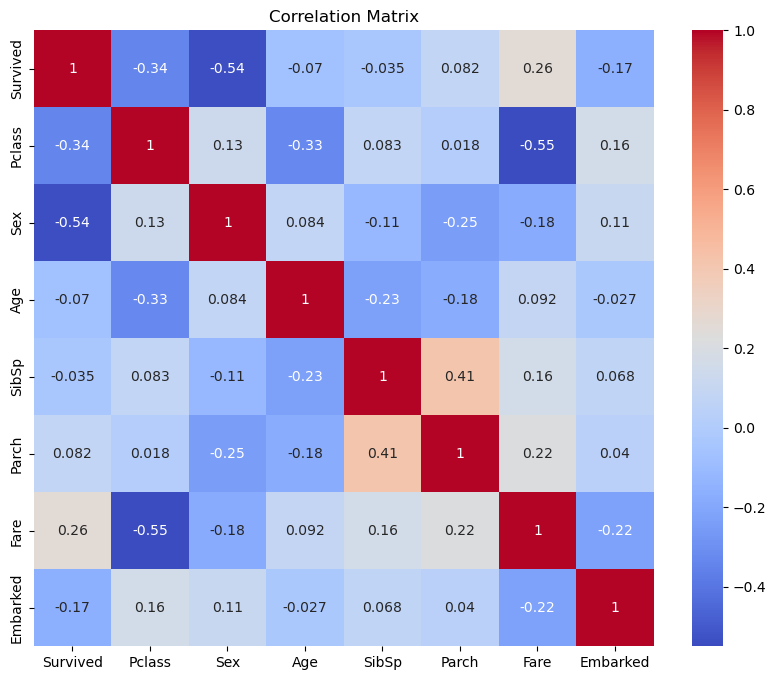

In [11]:
# Data Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

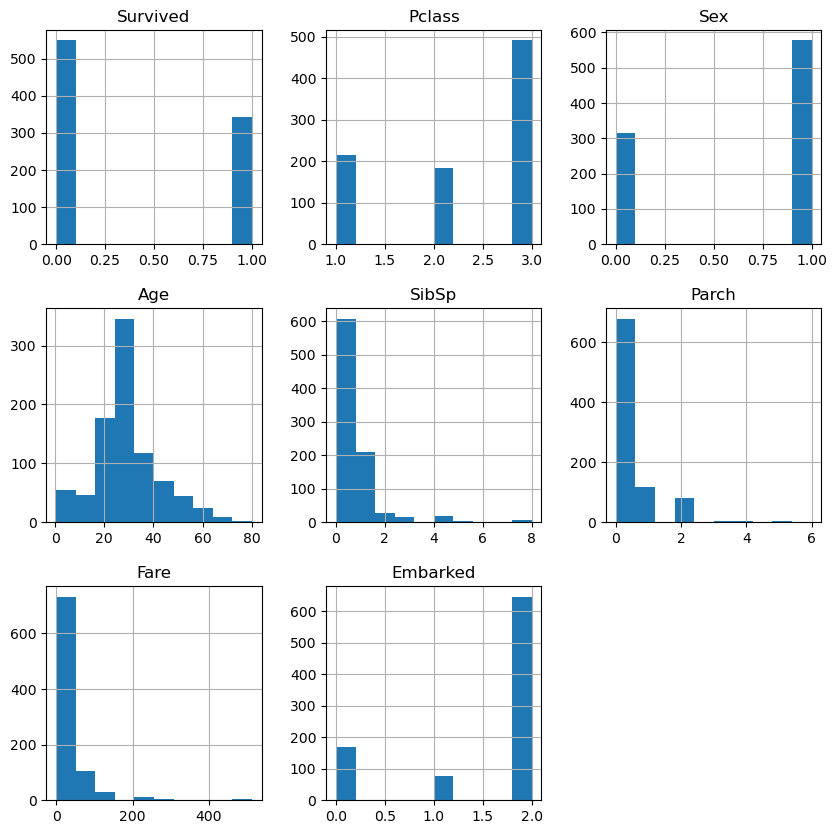

In [12]:
# Histograms
train_data.hist(figsize=(10, 10))
plt.show()


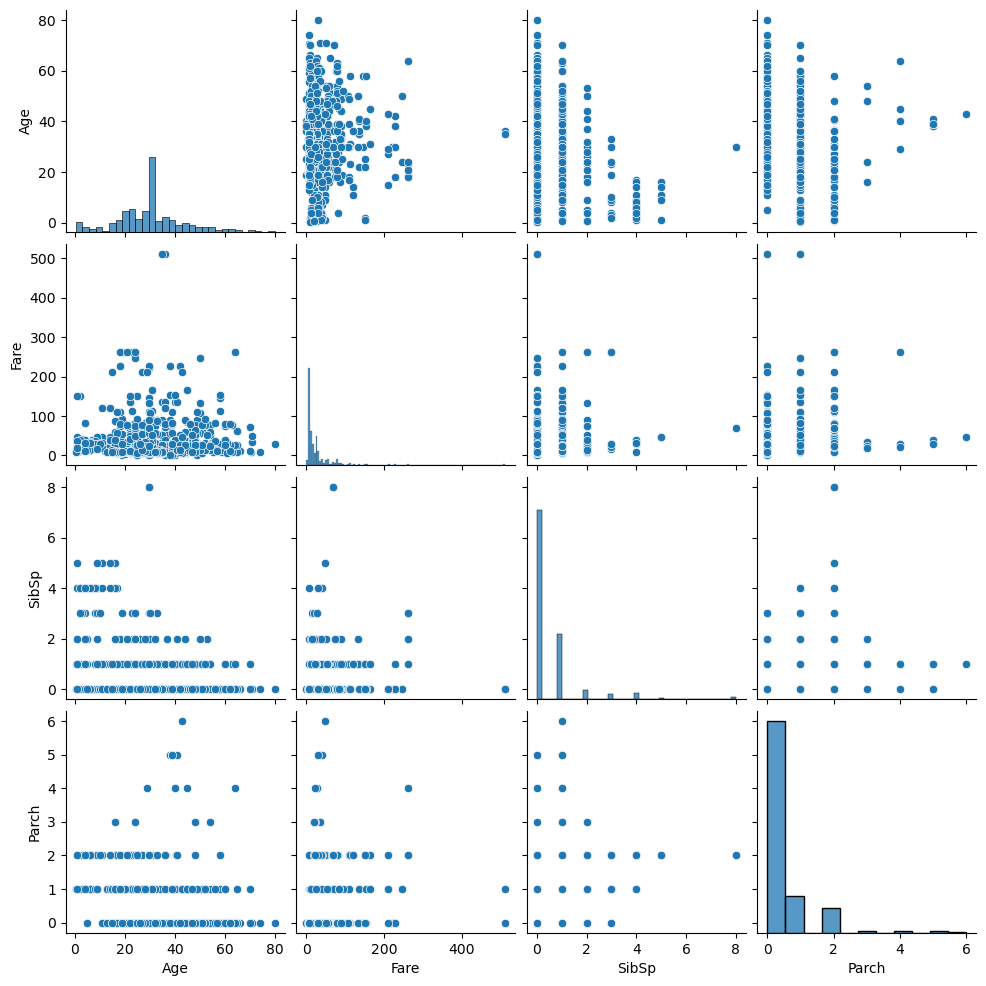

In [13]:
# Pair Plot
sns.pairplot(train_data, vars=['Age', 'Fare', 'SibSp', 'Parch'])
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [15]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()

# Fit the scaler on the train dataset
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(train_data), columns=train_data.columns)
print("Original DataFrame:\n", train_data)
print("Min-Max Scaled DataFrame:\n", df_min_max_scaled)

Original DataFrame:
      Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.000000      1      0   7.2500         2
1           1       1    0  38.000000      1      0  71.2833         0
2           1       3    0  26.000000      0      0   7.9250         2
3           1       1    0  35.000000      1      0  53.1000         2
4           0       3    1  35.000000      0      0   8.0500         2
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    1  27.000000      0      0  13.0000         2
887         1       1    0  19.000000      0      0  30.0000         2
888         0       3    0  29.699118      1      2  23.4500         2
889         1       1    1  26.000000      0      0  30.0000         0
890         0       3    1  32.000000      0      0   7.7500         1

[891 rows x 8 columns]
Min-Max Scaled DataFrame:
      Survived  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0 

In [16]:
test_data = pd.read_csv(r"C:\Users\preet\Excelr\Titanic_test.csv")
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print(test_data.head())


   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S


In [17]:
# Label encode categorical columns
def feature_encoding(df, cols):
    for col in cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

cols = ['Sex', 'Embarked']
test_data = feature_encoding(test_data, cols)



In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
# Apply the same scaler to the test dataset
df_min_max_scaled_test = pd.DataFrame(min_max_scaler.fit_transform(test_data),columns=test_data.columns)
print("Original DataFrame:\n", test_data)
print("Min-Max Scaled DataFrame:\n", df_min_max_scaled_test)

Original DataFrame:
      Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    1  34.5      0      0    7.8292         1
1         3    0  47.0      1      0    7.0000         2
2         2    1  62.0      0      0    9.6875         1
3         3    1  27.0      0      0    8.6625         2
4         3    0  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    1   NaN      0      0    8.0500         2
414       1    0  39.0      0      0  108.9000         0
415       3    1  38.5      0      0    7.2500         2
416       3    1   NaN      0      0    8.0500         2
417       3    1   NaN      1      1   22.3583         0

[418 rows x 7 columns]
Min-Max Scaled DataFrame:
      Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0       1.0  1.0  0.452723  0.000  0.000000  0.015282       0.5
1       1.0  0.0  0.617566  0.125  0.000000  0.013663       1.0
2       0.5  1.0  0.815377  0.000  0.000000  0.01890

In [19]:
from sklearn.model_selection import train_test_split

# Assuming train_data is the DataFrame containing the training data
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:

from sklearn.linear_model import LogisticRegression
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, roc_curve

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC score: {roc_auc}")


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888
ROC-AUC score: 0.8001930501930502


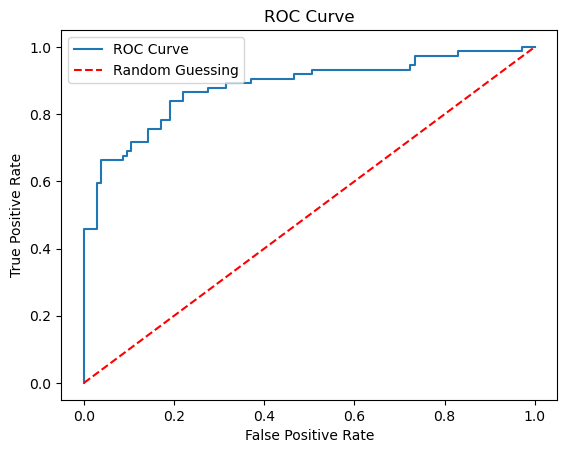

In [22]:
# Visualize the ROC curve
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="r", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': model.coef_[0]})
print(coefficients)

    feature  coefficient
0    Pclass    -0.931850
1       Sex    -2.597233
2       Age    -0.031150
3     SibSp    -0.295562
4     Parch    -0.115943
5      Fare     0.002499
6  Embarked    -0.223513


**Interpretation:**

The coefficient for 'Pclass' is -0.932423. This means that, for a one-unit increase in Pclass (from 2 to 3 or from 1 to 2), the log-odds of survival decrease by 0.932423, assuming all other features remain constant

**b. Discuss the significance of features in predicting the target variable (survival probability in this case).**

The significance of features can be determined by looking at the absolute value of their coefficients. The higher the absolute value, the more significant the feature is in predicting the target variable.

In this case, the 'Sex' feature has a large negative coefficient (-2.597091), which indicates that being male decreases the log-odds of survival compared to being female. Similarly, the 'Age' feature has a negative coefficient (-0.031173), suggesting that older passengers have lower survival probabilities than younger passengers.

The 'Pclass' feature has a negative coefficient (-0.932423), indicating that passengers in higher classes (1 and 2) have lower survival probabilities than passengers in lower classes (3).

The 'SibSp' and 'Parch' features have negative coefficients as well, suggesting that passengers with more siblings or parents/children have lower survival probabilities.

The 'Fare' feature has a positive coefficient (0.002499), meaning that higher fares are associated with higher survival probabilities.

The 'Embarked' feature has a negative coefficient (-0.222373), indicating that passengers embarking at 'S' (Southampton) have lower survival probabilities than passengers embarking at 'C' (Cherbourg) or 'Q' (Queenstown).

In summary, the logistic regression model suggests that 'Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', and 'Embarked' are significant features in predicting the survival probability of passengers on the Titanic.

In [31]:
import pickle
import streamlit
# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully.")

Model saved successfully.


In [28]:
!pip install streamlit